<a href="https://colab.research.google.com/github/pichayaanik/Capstone_PichayaAnik/blob/main/Part_1_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Discovering Key-Drivers for Boosting Thailand's Digital Competitiveness Index Using an NLP Approach**
---
Pichaya Charoonpongsakdi (Anik) <br>
GA-TDA DSI Capstone Project

# **Part 0: Problem Statement**
---

#**Part 1: Data Preparation**
---


##1.0 Install and Import Libraries

In [ ]:
# Install pythainlp library
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 7.7 MB/s 


In [189]:
# Import Basic Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Import Sklearn Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import NLP Libraries
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary
from pythainlp.tokenize import sent_tokenize, word_tokenize
from pythainlp.corpus import thai_stopwords
import re

# Other Libraries
from google.colab import files
from google.colab import drive

In [ ]:
# Download TH Sarabun (Thai font)
!gdown 1rZSpiIh6fTeaDPOCKvamgtlR3qN2UQEl

Downloading...
From: https://drive.google.com/uc?id=1rZSpiIh6fTeaDPOCKvamgtlR3qN2UQEl
To: /content/THSarabunNew.ttf
100% 474k/474k [00:00<00:00, 79.4MB/s]


In [ ]:
# Set TH Sarabun as default Thai font
mpl.font_manager.fontManager.addfont('/content/THSarabunNew.ttf')
mpl.rc('font', family='TH Sarabun New', size=20)

##1.1 Load Datasets

In [ ]:
# Download datasets from Google Drive
!gdown 1BQtzBne72ML1OoJG46IbYQ_v9pUrOq1K

Downloading...
From: https://drive.google.com/uc?id=1BQtzBne72ML1OoJG46IbYQ_v9pUrOq1K
To: /content/bkkbiz_update.json
100% 2.29G/2.29G [00:20<00:00, 111MB/s]


In [ ]:
# Import datasets
bkkbiz = pd.read_json('/content/bkkbiz_update.json')

In [ ]:
# Check head
bkkbiz.head()

,ID,date,category,title,description,article,url
0,620001,2014-11-27 08:01:00,ต่างประเทศ,น้ำมันดิบปิดร่วง-คาดโอเปคไม่ลดกำลังผลิต,น้ำมันดิบปิดร่วงแตะระดับต่ำสุดในรอบ 4 ปี-คาดโอ...,สัญญาน้ำมันดิบตลาดล่วงหน้าสหรัฐ ปิดตลาดปรับตัว...,https://www.bangkokbiznews.com/news/detail/620001
1,620002,2014-11-27 08:20:00,ต่างประเทศ,ทองคำปิดร่วงหลังสหรัฐเผยข้อมูลเศรษฐกิจ,สัญญาทองคำตลาดล่วงหน้าสหรัฐ ปิดปรับตัวลงเล็กน้...,สัญญาทองคำตลาดล่วงหน้าสหรัฐ ปิดปรับตัวลงเล็กน้...,https://www.bangkokbiznews.com/news/detail/620002
2,620009,2014-11-27 09:34:00,การเงิน-การลงทุน,"ทองแท่งขายออก18,600บ.ไม่เปลี่ยนแปลง","ราคาทองคำวันนี้ทองแท่งขายออกบาทละ 18,600 บาท ท...",สมาคมค้าทองคำรายงานราคาทอง 96.5% ประจำวันที่ 2...,https://www.bangkokbiznews.com/news/detail/620009
3,620010,2014-11-27 09:36:00,การเงิน-การลงทุน,เงินบาทเปิด32.75/77คาดแกว่งแคบ,ค่าเงินบาทเปิดที่ 32.75/77 บาท/ดอลลาร์ คาดแกว่...,นักบริหารเงินจากธนาคารพาณิชย์ เปิดเผยว่า เงินบ...,https://www.bangkokbiznews.com/news/detail/620010
4,620011,2014-11-27 09:48:00,การเงิน-การลงทุน,คาดหุ้นเช้าแกว่งไซด์เวย์,โบรกฯ คาดหุ้นเช้านี้แกว่งไซด์เวย์ช่วงไร้ปัจจัย...,นายอภิชาติ ผู้บรรเจิดกุล ผู้อำนวยการสายงานวิเค...,https://www.bangkokbiznews.com/news/detail/620011


##1.2 Data Cleaning


In [ ]:
# Check shape
bkkbiz.shape

(361228, 7)

In [ ]:
# Convert column heads to lower case
bkkbiz.columns.str.lower()

Index(['id', 'date', 'category', 'title', 'description', 'article', 'url'], dtype='object')

In [ ]:
# Check dtypes
bkkbiz.dtypes

ID                      int64
date           datetime64[ns]
category               object
title                  object
description            object
article                object
url                    object
dtype: object

In [ ]:
# Check nulls
bkkbiz.isnull().sum()

ID             0
date           0
category       0
title          0
description    0
article        0
url            0
dtype: int64

In [ ]:
# Check duplicate rows
set([bkkbiz['title'].value_counts().count(),
     bkkbiz['description'].value_counts().count(), 
     bkkbiz['article'].value_counts().count(), 
     bkkbiz.shape[0]])

{337402, 352490, 354923, 361228}

In [ ]:
# Check deplicates
bkkbiz['article'].value_counts().count(), bkkbiz['article'].isnull().sum()

(337402, 0)

##1.3 Corpus Overview
---

In [ ]:
bkkbiz.columns

Index(['ID', 'date', 'category', 'title', 'description', 'article', 'url'], dtype='object')

In [ ]:
# Number of article in each subcategory
bkkbiz['category'].value_counts().sort_values(ascending=False)

การเมือง              105331
การเงิน-การลงทุน       55041
ต่างประเทศ             42309
เศรษฐกิจ               35453
ไลฟ์สไตล์              24044
คุณภาพชีวิต-สังคม      18520
การเงิน                17742
ธุรกิจ                 16344
ทั่วไป                 15901
Data Analysis           3630
หุ้น                    3240
สาธารณสุข               2560
ประชาสัมพันธ์           2474
IT & gadget             1964
คอลัมนิสต์              1609
Bizweek                 1541
ข่าวพระราชสำนัก         1333
อสังหาริมทรัพย์         1331
ข่าวในพระราชสำนัก       1292
บันเทิง                 1286
นวัตกรรม                1191
@Taste                  1065
จุดประกาย                747
สุขภาพ-คุณภาพชีวิต       680
ท่องเที่ยว               582
ยานยนต์                  552
Art & living             545
การศึกษา                 487
ข่าวทั่วไป               406
สิ่งแวดล้อม              373
ดูดวง                    336
แรงงาน                   305
เศรษฐกิจ-ธุรกิจ          209
Corporate Moves          207
CEO Blog      

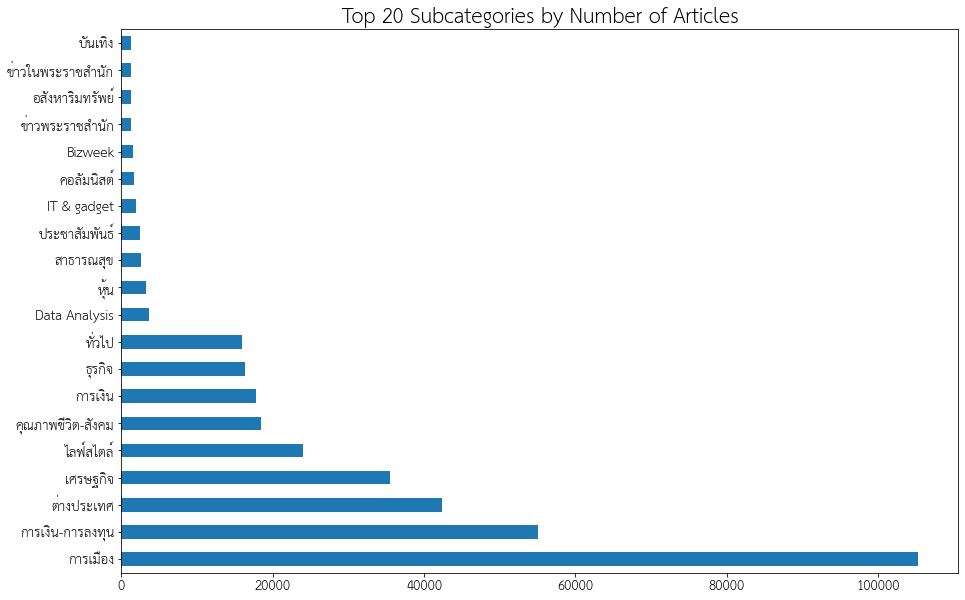

In [ ]:
# Top 20 subcategories by number of articles
plt.figure(figsize=(15,10))
plt.title('Top 20 Subcategories by Number of Articles', size=30)
bkkbiz['category'].value_counts().sort_values(ascending=False).head(20).plot(kind='barh');

In [ ]:
# Time released
bkkbiz['date'].dt.year.unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [ ]:
# Number of Article by Year
bkkbiz.groupby(bkkbiz['date'].dt.year)['title'].count()

date
2014     4646
2015    51297
2016    25825
2017    51332
2018    34992
2019    36653
2020    53321
2021    63939
2022    39223
Name: title, dtype: int64

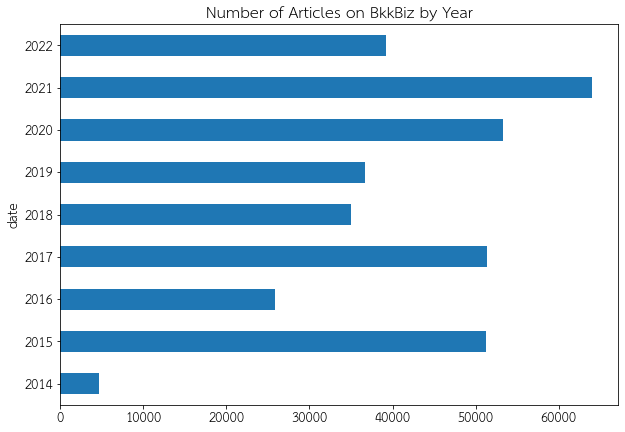

In [ ]:
# Number of Article by Year
plt.figure(figsize=(10,7))
plt.title('Number of Articles on BkkBiz by Year')
bkkbiz.groupby(bkkbiz['date'].dt.year)['title'].count().plot(kind='barh');

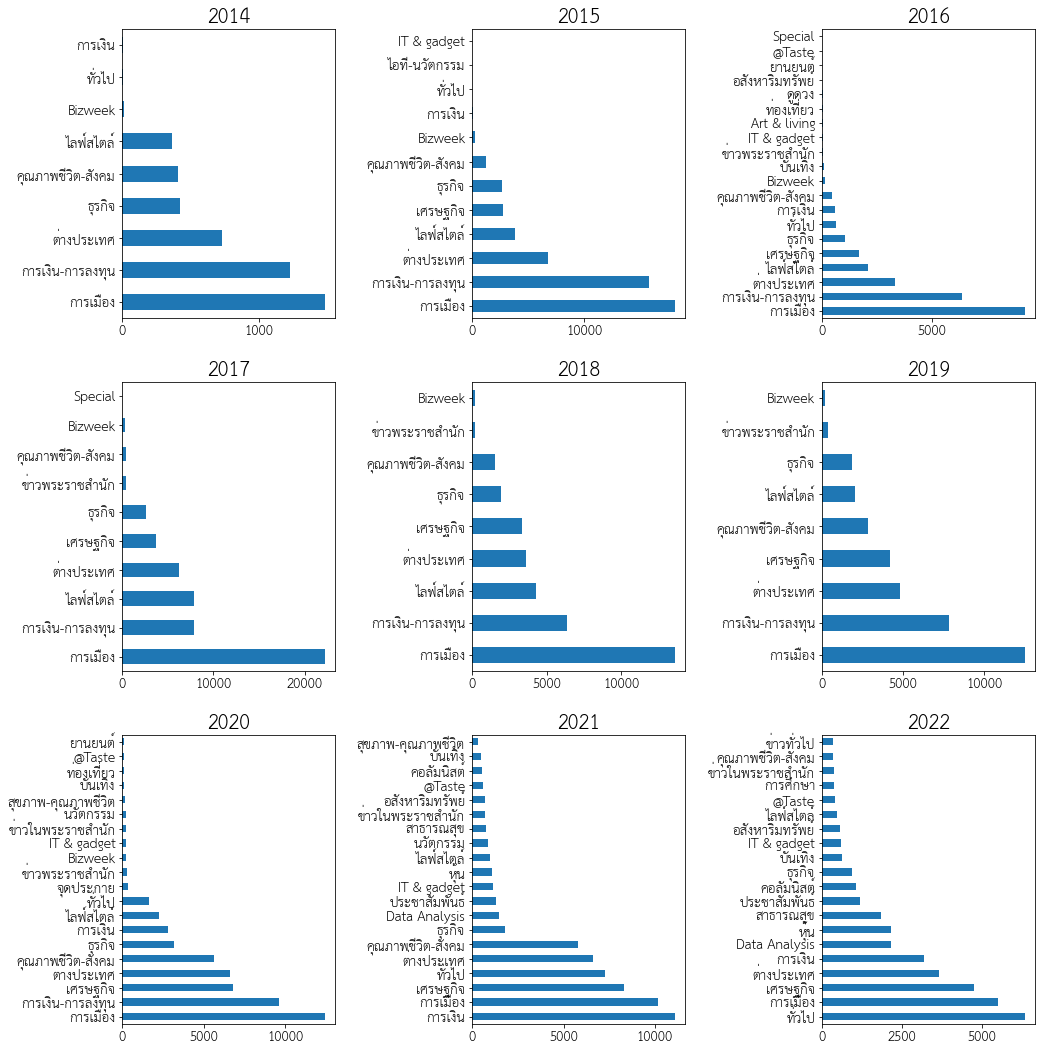

In [ ]:
# Number of articles by category by year
#fig, ax = plt.subplots(4,2, figsize=(15,30))
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

fig, axs = plt.subplots(3,3, figsize=(15,15), sharex=True)
for n, year in enumerate(years):
  plt.subplot(3,3,n+1)
  plt.title(year, size=30)
  plt.tight_layout()
  bkkbiz[bkkbiz['date'].dt.year==year]['category'].value_counts().head(20).plot(kind='barh');

In [ ]:
# Check 2019
bkkbiz[bkkbiz['date'].dt.year==2019]['category'].value_counts().head(20)

การเมือง             12517
การเงิน-การลงทุน      7857
ต่างประเทศ            4821
เศรษฐกิจ              4194
คุณภาพชีวิต-สังคม     2812
ไลฟ์สไตล์             2041
ธุรกิจ                1861
ข่าวพระราชสำนัก        388
Bizweek                162
Name: category, dtype: int64

In [ ]:
# Only category "ธุรกิจ"
bkkbiz[bkkbiz['category']=='ธุรกิจ'].groupby(bkkbiz['date'].dt.year)['title'].count()

date
2014     424
2015    2623
2016    1054
2017    2560
2018    1919
2019    1861
2020    3164
2021    1800
2022     939
Name: title, dtype: int64

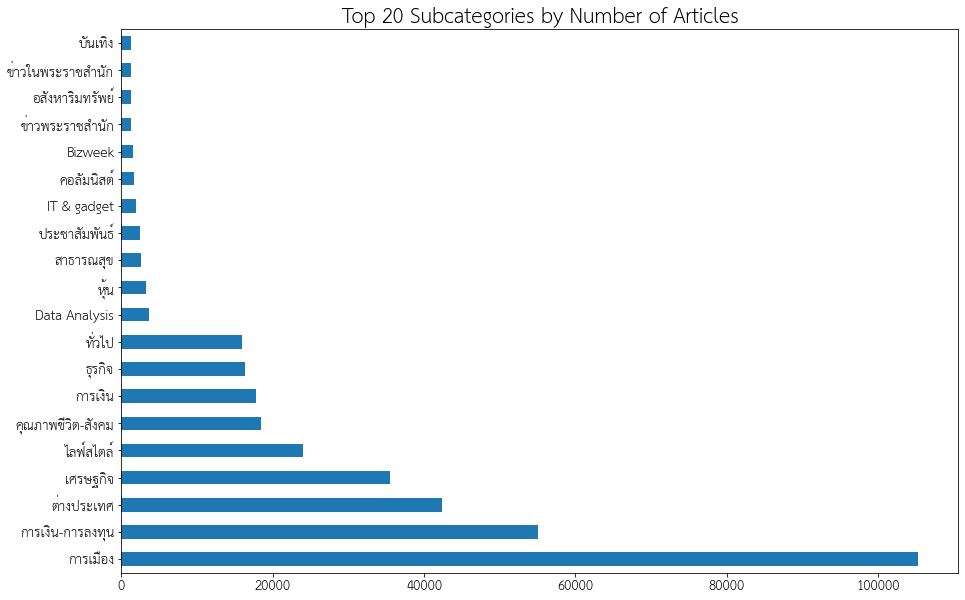

In [ ]:
# top 20 cat

plt.figure(figsize=(15,10))
plt.title('Top 20 Subcategories by Number of Articles', size=30)
bkkbiz['category'].value_counts().sort_values(ascending=False).head(20).plot(kind='barh');

##1.4 Pre-Processing
---

##Pre-processing workflows
1. create new DataFrame \
2. count words: 'title', 'description', 'article' \
3. list: tokenize + remove stop words + RegEx \
4. unlist: tokenize + remove stop words + RegEx

- Create new DataFrame based on articles from the following categories: 

| category | DataFrame Name |
| ---| ---|
| การเงิน-การลงทุน | investment |
| เศรษฐกิจ| econ |
| คุณภาพชีวิต-สังคม | social |
| การเงิน | finance |
| ธุรกิจ | business |
| Data analysis | data |

In [ ]:
df_dict = {'investment':'การเงิน-การลงทุน', 'econ':'เศรษฐกิจ', 'social':'คุณภาพชีวิต-สังคม',\
           'finance':'การเงิน', 'business':'ธุรกิจ', 'data':'Data Analysis'}

In [ ]:
col_list = ['title', 'description', 'article']

In [ ]:
df_names = list(df_dict)
df_names

['investment', 'econ', 'social', 'finance', 'business', 'data']

In [ ]:
# Create function that tokenize, remove stopwords and perform RegularExpression
def tokenize(txt):
  
  ''' 
  Description:
    A function that returns tokenized words with stop words and other regular expressions 
    that do not match English and Thai alphabets removed

  Parameters:
    txt = text string

  Return:
    word tokens as list
  '''

  stopwords = thai_stopwords()
  tokens = word_tokenize(txt, keep_whitespace = False)
  tokens = [token for token in tokens if token not in stopwords]
  tokens = [token for token in tokens if re.match(r'[A-Za-zก-๙0-9]+', token)]
  return tokens

In [ ]:
# Write a function for generating new DataFrame 
def cat_df(df_name):

  '''
  Description:
    A function that create a new DataFrame from existing bkkbiz corpus 
    filtered by category specified by input parameter. The following new features
    will be created as a result of the function:
      1. word count
      2. tokenized words list
      3. tokenized words outside of a list
  Parameters:
    Name of the new DataFrame as pre-defined in the df_dict
  Returns:
    New DataFrame
  '''

  # 1. Create new DataFrame
  df_name = bkkbiz[bkkbiz['category']==df_dict[df_name]].reset_index(drop=True)

  # 2. Create word count columns
  
  for col in col_list:
    df_name[col+'_count'] = df_name[col].apply(lambda x: len(word_tokenize(x ,keep_whitespace=False)))

    # 3. Tokenize, remove stop words, perform regular expression > ready for topic modeling
    df_name[col+'_tokenize_list'] = df_name[col].apply(tokenize)

    # 4. Take the tokens out of the list > ready to be vectorized
    df_name[col+'_tokenize_unlist'] = df_name[col+'_tokenize_list'].apply(lambda x:' '.join(x))

  return df_name

In [186]:
# Create new DataFrame
for key in df_dict:
  df = cat_df(key)
  df.to_csv(f'{key}.csv')
  print(f'Finish creating "{key}" DataFrame')

Finish creating "investment" DataFrame
Finish creating "econ" DataFrame
Finish creating "social" DataFrame
Finish creating "finance" DataFrame
Finish creating "business" DataFrame
Finish creating "data" DataFrame


In [188]:
# Download 
for key in df_dict:
  files.download(f'{key}.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Part 4: Modeling
---

In [ ]:
# Create Corpus
dictionary = Dictionary(test['article_tokenized'])
corpus = [dictionary.doc2bow(text) for text in test['article_tokenized']]

In [ ]:
# Model
def lda_model(num_topics=None, topicid=None):
  lda = LdaModel(corpus, num_topics=num_topics)
  topic = pd.DataFrame(lda_1.get_topic_terms(topicid=1, topn=20)).rename(columns={0:'index', 1:'probability'})
  top_20 = [dictionary[index] for index, prob in lda.get_topic_terms(topicid=topicid, topn=20)]
  return top_20


In [ ]:
lda_model(num_topics=5, topicid=0)

["'",
 '-',
 '"',
 'ไทย',
 'ทีม',
 ',',
 '2',
 '1',
 '3',
 'ปี',
 'วันที่',
 ')',
 '(',
 'โควิด',
 'คน',
 'ล้าน',
 'บาท',
 '4',
 '19',
 'ทำ']

In [ ]:
# Instantiate model
lda_1 = LdaModel(corpus, num_topics = 3)   

In [ ]:
# See words in the 1st topic
topic_1 = pd.DataFrame(lda_1.get_topic_terms(topicid=1, topn=20)).rename(columns={0:'index', 1:'probability'})
topic_1

,index,probability
0,1,0.031594
1,0,0.013589
2,2,0.011026
3,279,0.005958
4,101,0.005512
5,37,0.005236
6,470,0.005064
7,78,0.004900
8,51,0.004546
9,34856,0.004383


In [ ]:
topic_1 = topic_1.rename(columns={0:'index', 1:'probability'})
type(topic_1)

pandas.core.frame.DataFrame

In [ ]:
topic_1_test = lda_1.show_topics(formatted=False)
topic_1_test

[(0,
  [('1', 0.021037055),
   ('0', 0.012165701),
   ('621', 0.007095062),
   ('98', 0.006489503),
   ('99', 0.0061611314),
   ('69', 0.0058810534),
   ('2', 0.005835319),
   ('231', 0.005793298),
   ('101', 0.005258681),
   ('279', 0.0051404457)]),
 (1,
  [('1', 0.031594224),
   ('0', 0.01358872),
   ('2', 0.011025867),
   ('279', 0.005958481),
   ('101', 0.0055115186),
   ('37', 0.0052360413),
   ('470', 0.0050639906),
   ('78', 0.004900142),
   ('51', 0.004546382),
   ('34856', 0.0043827933)]),
 (2,
  [('1', 0.034448985),
   ('113', 0.013822185),
   ('37', 0.013489862),
   ('97', 0.013275735),
   ('209', 0.011586499),
   ('2', 0.010790966),
   ('46', 0.010138918),
   ('98', 0.009765995),
   ('99', 0.009626163),
   ('0', 0.007961102)])]

In [ ]:
top20_1 = [dictionary[index] for index, prob in lda_1.get_topic_terms(topicid=0, topn=20)]

In [ ]:
top20_1

["'",
 '"',
 '.',
 '(',
 ')',
 'เรื่อง',
 '-',
 'ไทย',
 '1',
 'คน',
 '2',
 '3',
 'ทำ',
 'ประเทศ',
 '/',
 'ปี',
 'พื้นที่',
 'ประชาชน',
 'อ.',
 '5']

In [ ]:
top20_2 = [dictionary[index] for index, prob in lda_1.get_topic_terms(topicid=1, topn=20)]

top20_2

["'",
 '"',
 '-',
 'คน',
 '1',
 'ปี',
 '2',
 '3',
 'วันที่',
 'โควิด',
 'ทีม',
 ')',
 'ไทย',
 ',',
 'ล้าน',
 'บาท',
 '4',
 'เรื่อง',
 'เดินทาง',
 '(']

In [ ]:
top20_3 = [dictionary[index] for index, prob in lda_1.get_topic_terms(topicid=2, topn=20)]

top20_3

["'",
 'บาท',
 'ปี',
 '%',
 'ล้าน',
 '-',
 'ราคา',
 '(',
 ')',
 '"',
 'ไทย',
 'คาด',
 'บริษัท',
 '3',
 'ลดลง',
 'หุ้น',
 'ซื้อ',
 'ตลาด',
 '1',
 'เศรษฐกิจ']

In [ ]:
# Evaluation: perplexity